In [133]:
from sklearn.linear_model import LinearRegression # Import the linear regression model
import matplotlib.pyplot as plt # The plotting library
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn import tree
import pydotplus
import graphviz
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

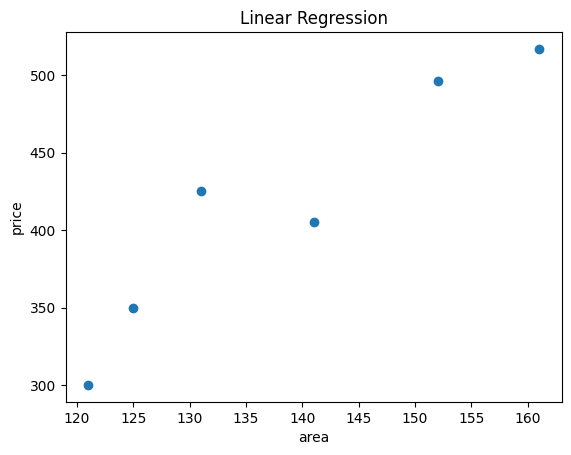

In [134]:
x = np.array([121, 125, 131, 141, 152, 161]).reshape(-1,1) # x denotes the house area as a feature.
y = np.array([300, 350, 425, 405,496,517]) # y denotes the house price.
plt.scatter(x,y)
plt.title("Linear Regression")
plt.xlabel("area") # X axis indicates the area.
plt.ylabel("price") # Y axis indicates the price.
plt.show()

In [135]:
lr = LinearRegression() # Encapsulate the linear regression model into an object.
lr.fit(x,y) # Train the model on the dataset.

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [136]:
w = lr.coef_# Slope of the model
b = lr.intercept_# Intercept of the model
print('Slope: ',w)
print('Intercept: ',b)

Slope:  [4.98467124]
Intercept:  -274.8769665187576


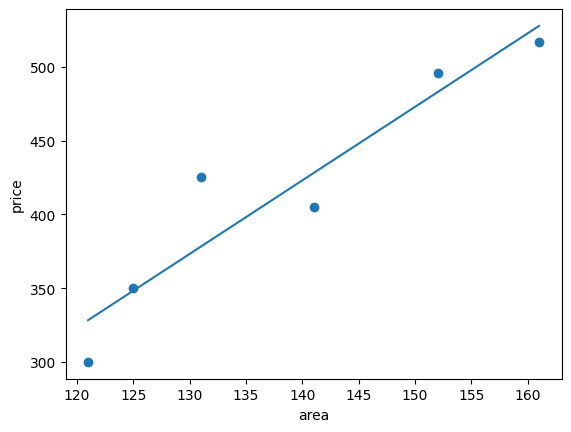

In [137]:
plt.scatter(x,y)
plt.xlabel("area") # X axis indicates the area.
plt.ylabel("price") # Y axis indicates the price.
plt.plot([x[0],x[-1]],[x[0]*w+b,x[-1]*w+b])

In [138]:
testX = np.array([[130]])# A test sample with an area of 130
lr.predict(testX)

array([373.13029447])

In [139]:
def generate_gradient(X, theta, y):
    sample_count = X.shape[0]
    return (1./sample_count)*X.T.dot(X.dot(theta)-y)

In [140]:
def get_training_data(file_path):
    orig_data = np.loadtxt(file_path,skiprows=1) 
    cols = orig_data.shape[1]
    return (orig_data, orig_data[:, :cols - 1], orig_data[:, cols-1:])

In [141]:
def init_theta(feature_count):
    return np.ones(feature_count).reshape(feature_count, 1)

In [142]:
def gradient_descending(X, y, theta, alpha):
    Jthetas = []  # Record the change trend of the cost function J(θ)

    # Calculate the loss function: (y^i - h(x^i))^2
    Jtheta = (X.dot(theta) - y).T.dot(X.dot(theta) - y)

    index = 0
    gradient = generate_gradient(X, theta, y)  # Calculate the gradient

    # End when the gradient is sufficiently small
    while not np.all(np.absolute(gradient) <= 1e-5):
        theta = theta - alpha * gradient
        gradient = generate_gradient(X, theta, y)  # New gradient

        # Recalculate loss
        Jtheta = (X.dot(theta) - y).T.dot(X.dot(theta) - y)

        if (index + 1) % 10 == 0:
            Jthetas.append((index, Jtheta[0]))  # Record every 10 steps

        index += 1

    return theta, Jthetas


In [143]:
# Plot the loss function change curve.
def showJTheta(diff_value):
    p_x = []
    p_y = []

    for (index, sum) in diff_value:
        p_x.append(index)
        p_y.append(sum)

    plt.plot(p_x, p_y, color='b')
    plt.xlabel('steps')
    plt.ylabel('loss function')
    plt.title('step - loss function curve')
    plt.show()


In [144]:
# Plot the actual data points and the fitted curve.
def showlinercurve(theta, sample_training_set):
    x, y = sample_training_set[:, 1], sample_training_set[:, 2]
    z = theta[0] + theta[1] * x

    plt.scatter(x, y, color='b', marker='x', label="sample data")
    plt.plot(x, z, color='r', label="regression curve")

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('linear regression curve')
    plt.legend()
    plt.show()


w: 3.0076279423997594 b: 1.668677412281192


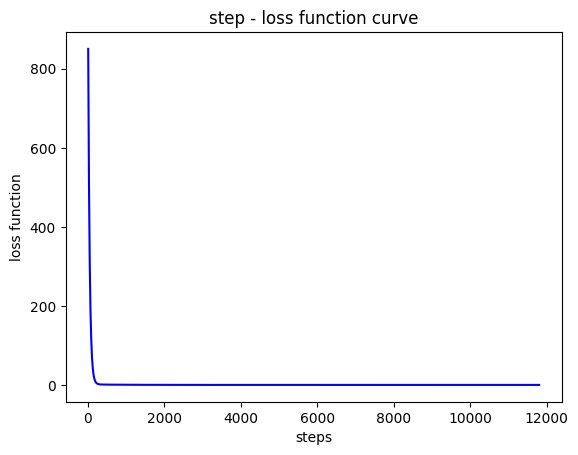

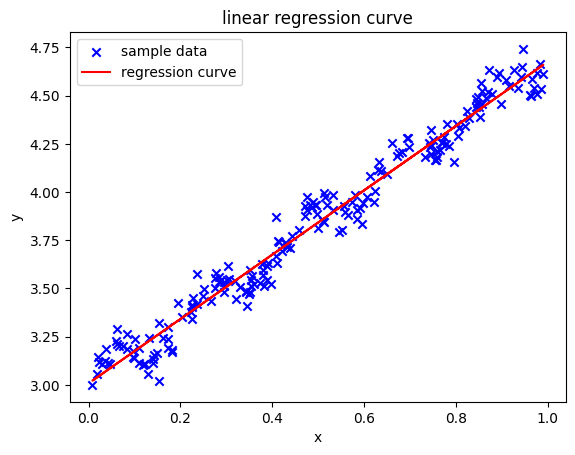

In [145]:
# Read the dataset.
training_data_include_y, training_x, y = get_training_data(r"C:\Users\renpg\Downloads\Dataset (1)\ML\02\lr2_data.txt")

# Obtain the numbers of samples and features.
sample_count, feature_count = training_x.shape

# Define the learning rate α.
alpha = 0.01

# Initialize θ.
theta = init_theta(feature_count)

# Obtain the final parameter θ and cost history.
result_theta, Jthetas = gradient_descending(training_x, y, theta, alpha)

# Display the parameters.
print("w: {}".format(result_theta[0][0]), "b: {}".format(result_theta[1][0]))

# Plot results.
showJTheta(Jthetas)
showlinercurve(result_theta, training_data_include_y)


In [146]:
X=[[2200,15],[2750,20],[5000,40],[4000,20],[3300,20],[2000,10],[2500,12],[12000,80],
[2880,10],[2300,15],[1500,10],[3000,8],[2000,14],[2000,10],[2150,8],[3400,20],
[5000,20],[4000,10],[3300,15],[2000,12],[2500,14],[10000,100],[3150,10],
[2950,15],[1500,5],[3000,18],[8000,12],[2220,14],[6000,100],[3050,10]
]
y=[1,1,0,0,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0,1,1,1,0,1,0,1,0,1,1,0]

In [147]:
ss = StandardScaler()

X_train = ss.fit_transform(X)

In [148]:
print(X_train)

[[-0.60583897 -0.29313058]
 [-0.37682768 -0.09050576]
 [ 0.56003671  0.71999355]
 [ 0.14365254 -0.09050576]
 [-0.14781638 -0.09050576]
 [-0.68911581 -0.49575541]
 [-0.48092372 -0.41470548]
 [ 3.47472592  2.34099218]
 [-0.32269773 -0.49575541]
 [-0.56420055 -0.29313058]
 [-0.89730789 -0.49575541]
 [-0.27273163 -0.57680534]
 [-0.68911581 -0.33365555]
 [-0.68911581 -0.49575541]
 [-0.62665818 -0.57680534]
 [-0.10617796 -0.09050576]
 [ 0.56003671 -0.09050576]
 [ 0.14365254 -0.49575541]
 [-0.14781638 -0.29313058]
 [-0.68911581 -0.41470548]
 [-0.48092372 -0.33365555]
 [ 2.64195758  3.15149149]
 [-0.21027401 -0.49575541]
 [-0.29355084 -0.29313058]
 [-0.89730789 -0.69838024]
 [-0.27273163 -0.17155569]
 [ 1.80918923 -0.41470548]
 [-0.59751129 -0.33365555]
 [ 0.97642089  3.15149149]
 [-0.25191242 -0.49575541]]


In [149]:
# Use the fit method of LogisticRegression to train model parameters.
lr = LogisticRegression()
lr.fit(X_train, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [150]:
testX = [[2000,8]]
X_test = ss.transform(testX)
print("Value to be predicted: ",X_test)
label = lr.predict(X_test)
print("predicted label = ", label)
# Output the predicted probability.
prob = lr.predict_proba(X_test)
print("probability = ",prob)

Value to be predicted:  [[-0.68911581 -0.57680534]]
predicted label =  [1]
probability =  [[0.41882379 0.58117621]]


In [151]:
X, y = make_blobs(n_samples=500,n_features=2,centers=4,random_state=1)

In [153]:
print("Dimension of X is {}".format(X.shape))
print("Dimension of y is {}".format(y.shape))

Dimension of X is (500, 2)
Dimension of y is (500,)


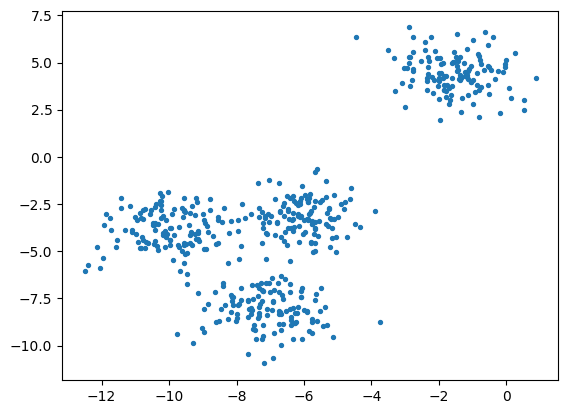

In [154]:
fig, ax1 = plt.subplots(1)
ax1.scatter(X[:, 0], X[:, 1]
,marker='o' # Set the shape of the point to circle.
,s=8 # Set the size of the point.
)
plt.show()

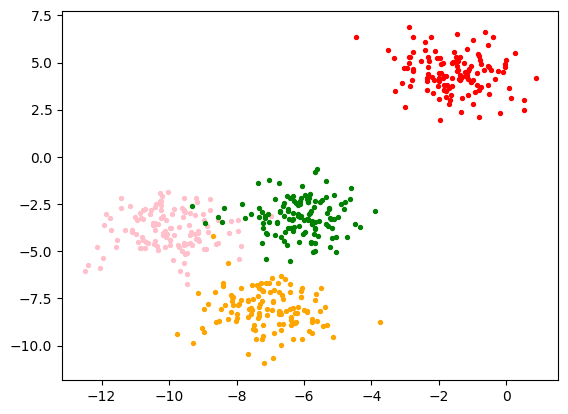

In [156]:
color = ["red","pink","orange","green"]
fig, ax1 = plt.subplots(1)
for i in range(4):
    ax1.scatter(X[y==i, 0], X[y==i, 1] # Draw the color based on the label.
        ,marker='o' # Set the shape of the point to circle.
        ,s=8 # Set the size of the point.
        ,c=color[i]
    )
plt.show()

In [157]:
n_clusters = 3
cluster1 = KMeans(n_clusters=n_clusters,random_state=3).fit(X)

In [158]:
y_pred1 = cluster1.labels_
print(y_pred1)

[2 2 1 0 1 0 1 1 1 1 2 2 1 0 1 2 1 2 0 1 1 1 1 0 1 1 0 0 1 1 2 0 1 2 1 2 1
 1 2 1 1 1 0 1 1 2 1 1 0 0 0 1 1 1 2 1 1 1 1 1 0 0 1 1 0 1 2 1 1 1 2 1 1 2
 1 1 2 1 1 1 0 0 1 0 0 1 1 0 1 1 0 2 1 1 0 2 2 1 2 0 0 2 0 1 0 1 1 0 0 1 1
 2 0 1 0 1 0 1 0 1 1 2 2 1 1 1 0 2 2 1 0 1 1 1 1 2 0 1 0 0 1 2 1 0 0 0 1 1
 2 2 1 1 0 2 0 1 1 1 1 1 1 1 1 1 0 2 2 2 1 0 2 1 1 2 0 1 1 1 1 2 1 1 0 2 2
 1 1 2 2 1 0 0 2 2 1 0 1 2 2 0 2 1 0 1 1 2 1 1 2 1 1 1 1 2 1 1 1 0 1 0 1 2
 1 1 1 1 1 0 1 0 2 1 2 1 0 0 1 2 0 2 1 1 2 2 2 2 1 1 2 1 1 0 0 1 1 0 1 1 1
 0 1 0 1 1 0 1 2 2 1 1 1 1 0 0 1 0 1 2 0 2 0 2 2 0 2 0 0 1 1 1 1 1 1 1 2 0
 2 2 2 1 1 1 2 1 2 2 1 2 2 1 0 2 1 1 0 0 1 2 0 0 1 2 0 0 1 1 0 1 1 2 2 0 1
 2 1 0 0 1 1 1 2 1 0 0 1 0 0 0 0 2 2 1 0 1 1 2 0 1 0 1 0 1 1 1 0 1 1 2 0 2
 2 2 2 2 2 1 2 0 2 0 0 1 0 1 1 1 2 0 1 0 1 2 1 1 2 1 1 0 0 2 1 1 0 1 1 2 2
 1 2 1 1 2 1 2 1 0 2 0 1 1 0 1 1 0 2 1 0 0 1 1 1 1 2 0 2 1 0 2 2 2 1 0 1 2
 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 0 1 0 1 1 1 0 0 0 1 1 1 2 1 0 1 2 0 2 0 2
 1 0 0 2 1 1 2 1 1 1 2 1 

In [159]:
centroid1 = cluster1.cluster_centers_
print(centroid1)

[[-1.54234022  4.43517599]
 [-8.0862351  -3.5179868 ]
 [-7.09306648 -8.10994454]]


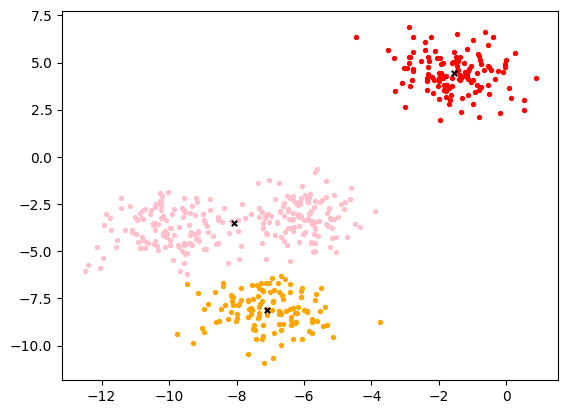

In [160]:
color = ["red", "pink", "orange", "gray"]
fig, ax1 = plt.subplots(1)

for i in range(n_clusters):
    ax1.scatter(
        X[y_pred1 == i, 0],
        X[y_pred1 == i, 1],
        marker='o',  # Set the shape of the point to circle
        s=8,         # Set the size of the point
        c=color[i]
    )

# Plot the centroids
ax1.scatter(
    centroid1[:, 0],
    centroid1[:, 1],
    marker="x",
    s=15,
    c="black"
)

plt.show()


In [161]:
n_clusters = 4
cluster2 = KMeans(n_clusters=n_clusters,random_state=0).fit(X)
y_pred2 = cluster2.labels_
centroid2 = cluster2.cluster_centers_
print("Centroid: {}".format(centroid2))

Centroid: [[ -6.08459039  -3.17305983]
 [-10.00969056  -3.84944007]
 [ -7.09306648  -8.10994454]
 [ -1.54234022   4.43517599]]


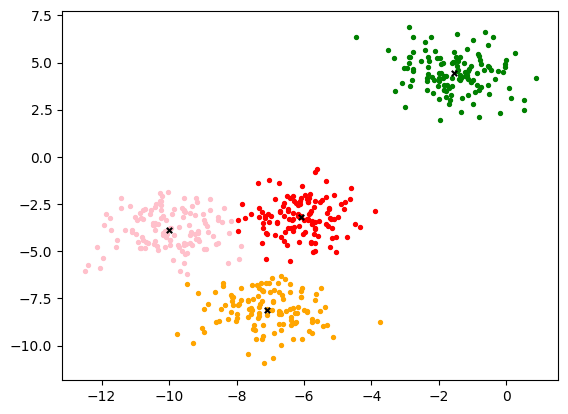

In [162]:
color = ["red", "pink", "orange", "green"]
fig, ax1 = plt.subplots(1)

# Plot each cluster
for i in range(n_clusters):
    ax1.scatter(
        X[y_pred2 == i, 0],
        X[y_pred2 == i, 1],
        marker='o',  # Set the shape of the point to circle
        s=8,         # Set the size of the point
        c=color[i]
    )

# Plot the centroids
ax1.scatter(
    centroid2[:, 0],
    centroid2[:, 1],
    marker="x",
    s=15,
    c="black"
)

plt.show()
